# CNN Model


Predicted class: Happy


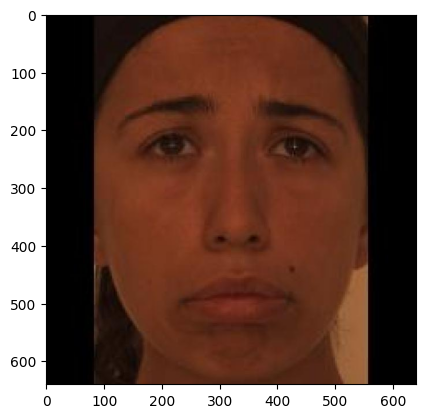

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path= r"D:\Courses\Projects\EMD\comparison\best_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


class_names = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', 'Surprise']

# Preprocess the input image

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize((48, 48))  
    img = np.array(img) / 255.0  # Normalize pixel values
    img = img[np.newaxis, ..., np.newaxis]  
    return img.astype(np.float32)


# Run inference on the input image
def classify_image(image_path):
    input_data = preprocess_image(image_path)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_index = np.argmax(output_data)
    predicted_class = class_names[predicted_class_index]
    return predicted_class

# Example usage
image_path = r"D:\Courses\Projects\EMD\comparison\expression.v1i.coco\test\bs012_E_SADNESS_0_png_jpg.rf.921625c09f386397e0ee1ea9528e9614.jpg"  
predicted_class = classify_image(image_path)
print("Predicted class:", predicted_class)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# YOLO

In [2]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Load the YOLO model
model = YOLO('best.pt')



0: 224x224 sadness 0.91, neutrality 0.09, happiness 0.00, fear 0.00, anger 0.00, 265.7ms
Speed: 7.9ms preprocess, 265.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Predicted class: sadness with probability: 0.91


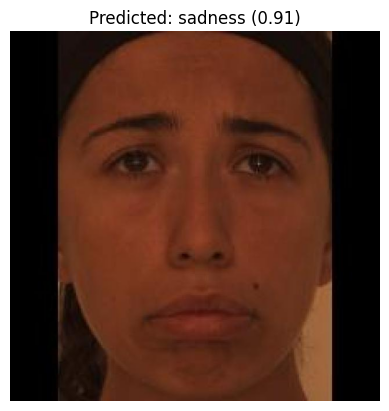

In [3]:
# Read the image using OpenCV
img_path = r"D:\Courses\Projects\EMD\comparison\expression.v1i.coco\test\bs012_E_SADNESS_0_png_jpg.rf.921625c09f386397e0ee1ea9528e9614.jpg"  
img = cv2.imread(img_path)
if img is None:
    raise ValueError(f"Failed to read the image from the path: {img_path}")

# Convert BGR image to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform prediction on the image
results = model.predict(source=img)

# Process the results
if results:
    result = results[0]
    names_dict = result.names
    
    # Check if probabilities are available
    if result.probs is not None:
        probs = result.probs.cpu().numpy()  # Convert to numpy array
        
        # Check if top prediction is available
        if result.probs.top1 is not None:
            class_idx = result.probs.top1  # Get the index of the top prediction
            class_name = names_dict[class_idx]  # Get the corresponding class name
            class_prob = result.probs.top1conf  # Get the confidence of the top prediction
            
            print(f"Predicted class: {class_name} with probability: {class_prob:.2f}")

            # Plot the image using matplotlib
            plt.imshow(img_rgb)
            plt.title(f"Predicted: {class_name} ({class_prob:.2f})")
            plt.axis('off')
            plt.show()
        else:
            print("No top prediction available.")
    else:
        print("No probabilities returned.")
else:
    print("No results returned.")